#### 🌳LAB 4: Decision Tree Classification + Hyperparameter Tuning

**This lab teaches:**

    1: How to train a Decision Tree classifier
    
    2: How to evaluate training vs test performance
    
    3: How to detect overfitting
    
    4: How to use GridSearchCV for hyperparameter tuning
    
    5: How different metrics change the “best model”
    
    6: How to include a business cost function in model evaluation

**STEP 1 — Import Libraries**

### **Code Instructions for Students**

- Import all required Python libraries  
- Silence warnings for clean output  
- Import **Decision Tree**, **train/test split**, **metrics**, and **Grid Search**


**Explanation**: This cell loads all the tools required for training, evaluating, and tuning a Decision Tree classifier. We also import `make_scorer` to build a custom business metric later.

**STEP 2 — Load the Data**  
**Code Instructions**

- Install Excel reader library (`xlrd`)  
- Load the credit default dataset  
- Print the dataset shape  
- Preview the first few rows


In [4]:
# !pip install xlrd>=2.0.1


(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**Explanation**: 

This dataset contains **30,000 customers** and **24 features**.  
The target variable is **default payment next month**, representing **credit default (0/1)**.


**STEP 3 — Prepare X and y**  
**Code Instructions**

- Define the target column  
- Remove the ID column (not useful for prediction)  
- Create the feature matrix **X** and label vector **y**


📘 **Explanation**

The ID column carries no predictive value.  
All other columns become input features for the Decision Tree.


**STEP 4 — Train/Test Split**  
**Code Instructions**

- Use **67%** of data for training  
- Use **33%** for testing  
- Fix random seed for reproducibility  


📘 **Explanation**

We split the dataset to evaluate how well the model generalises to unseen data.  
The random state ensures every student gets the same split.


**STEP 5 — Train a Simple Decision Tree (Baseline)**  
**Code Instructions**

- Train a default Decision Tree  
- Compute training and test accuracy  
- Print the depth of the tree


Training accuracy: 99.97014925373135
Test accuracy: 72.31313131313132
Tree depth: 5600


📘 **Explanation**

A default decision tree typically grows very deep, perfectly memorising the training data — this causes **overfitting**.

If training accuracy is ~100% but test accuracy is much lower, it means the model has memorised the training examples instead of learning generalisable patterns.


STEP 6 — Build a Custom Business Cost Function  

📌 **Why?**: 
A bank does not optimise accuracy.  
It cares more about costs of mistakes, especially false negatives (missing risky customers).

---

**Code Instructions**

- Create a **cost matrix**  
- Build a **custom scoring function** using the confusion matrix  
- Wrap it using **make_scorer**  


📘 **Explanation**

Interpretation of the cost matrix:

- **False Positive (FP): -2** → approving a risky client  
- **False Negative (FN): -10** → rejecting a good client (bigger penalty)  
- **True Positive (TP): +10** → detecting a risky customer  
- **True Negative (TN): 0** → neutral  

This allows the bank to optimise for real business value.


STEP 7 — Hyperparameter Grid  
Goal  

We tune:

- `max_depth` (model complexity)  
- `criterion` ("gini" or "entropy")  
- `class_weight` (important for imbalanced classes)  

Code Instructions


📘 **Explanation**

This is a small but effective grid.  
It forces the algorithm to consider simpler models and different weighting strategies.


**STEP 8 — Cross-Validation Setup**

**Why Stratified?**  
Stratified cross-validation ensures that each fold preserves the same proportion of default vs. non-default cases, which is essential for imbalanced datasets.

---

### ✅ **Code Instructions**

- Use **StratifiedKFold** instead of regular K-Fold  
- Set `n_splits` (e.g., 5)  
- Shuffle data and fix the random state  
- Pass this CV object into Grid Search  


📘 **Explanation**

Stratification reduces randomness and improves reliability of cross-validation results.


**STEP 9 — Run Grid Search for Different Metrics**

**Goal**

Show students that:

- Different metrics → different best models  
- Business value often disagrees with accuracy  

**Code Instructions**

Loop through scoring metrics (accuracy, precision, recall, F1, custom):



Optimising for: accuracy
Best params: {'class_weight': None, 'criterion': 'gini', 'max_depth': 1}
Best CV score: 0.8186567164179105
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7719
           1       0.69      0.34      0.46      2181

    accuracy                           0.82      9900
   macro avg       0.77      0.65      0.67      9900
weighted avg       0.81      0.82      0.80      9900



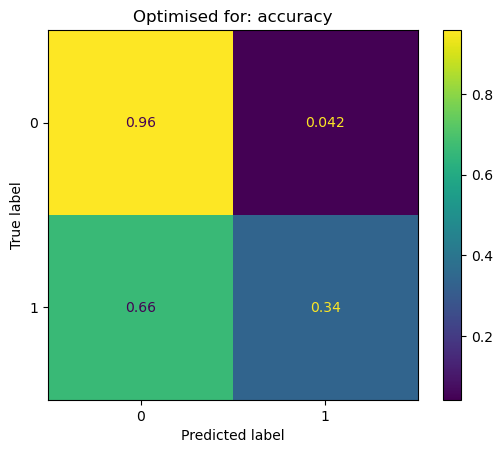

Business value: -7680

Optimising for: precision
Best params: {'class_weight': None, 'criterion': 'gini', 'max_depth': 2}
Best CV score: 0.7668776045808517
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7719
           1       0.70      0.33      0.45      2181

    accuracy                           0.82      9900
   macro avg       0.77      0.65      0.67      9900
weighted avg       0.81      0.82      0.80      9900



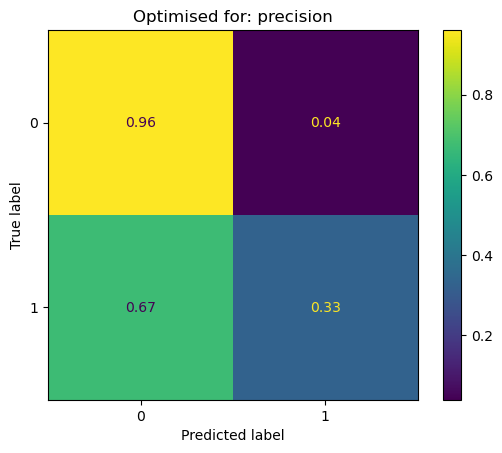

Business value: -8000

Optimising for: recall
Best params: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5}
Best CV score: 0.6955144284003344
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      7719
           1       0.49      0.56      0.53      2181

    accuracy                           0.78      9900
   macro avg       0.68      0.70      0.69      9900
weighted avg       0.79      0.78      0.78      9900



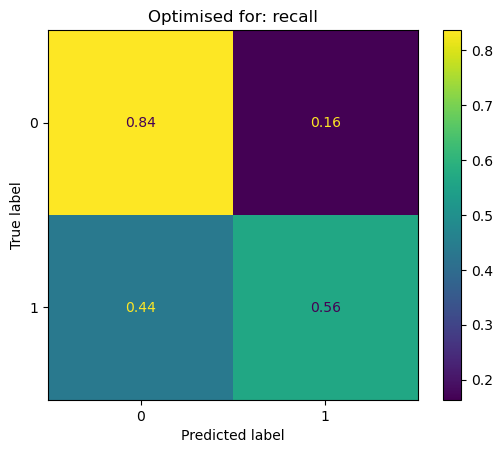

Business value: 288

Optimising for: f1
Best params: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 1}
Best CV score: 0.6831471530455805
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      7719
           1       0.50      0.53      0.51      2181

    accuracy                           0.78      9900
   macro avg       0.68      0.69      0.69      9900
weighted avg       0.78      0.78      0.78      9900



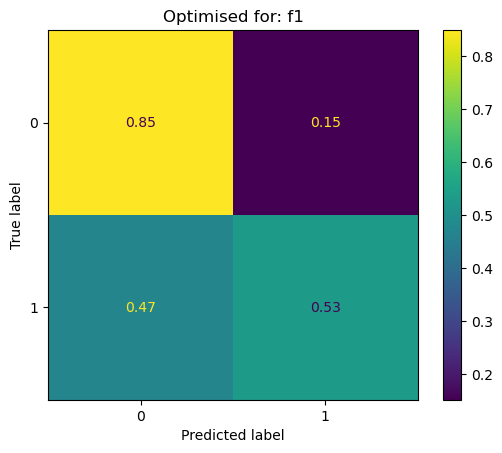

Business value: -930

Optimising for: custom
Best params: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 6}
Best CV score: 725.3333333333334
              precision    recall  f1-score   support

           0       0.88      0.78      0.82      7719
           1       0.44      0.61      0.51      2181

    accuracy                           0.74      9900
   macro avg       0.66      0.70      0.67      9900
weighted avg       0.78      0.74      0.76      9900



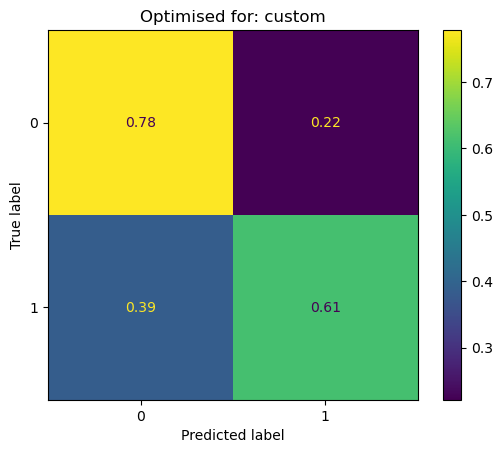

Business value: 1546


📘 Explanation

This loop performs:

- **Grid Search**  
  Finds optimal hyperparameters for each metric.

- **Test Set Evaluation**  
  Prints the classification report.

- **Confusion Matrix Plot**  
  Helps students interpret model behaviour.

- **Business Value Calculation**  
  Evaluates the model economically.

Students will notice:

- **Accuracy** prefers shallow models  
- **Recall/F1** prefer balanced class weights  
- **Custom scorer** discovers a more profitable model, even with lower accuracy
